# Introduction to kinetic modeling with SBML

Kinetic modeling based on ordinary differential equations (ODE) plays an important role in computational biology. An important aspect of such models is its reusability and the reproducibility of the results. An important step towards reproducible and understandable models was the introduction of standard formats for model description (SBML, CellML, BioPax) and guidlines for model description (MIRIAM) and simulation description (MIASE) were developed. These standards are currently supported by a wide range of libraries and software tools, providing a rich environment for the work with such models.  
In addition to standard formats, IPython notebooks provide the visual framework for representing model setup, simulation and results in a unified and reproducible way.

This notebook demonstrates the basic work with computational models based on the Systems Biology Markup Language (SBML), the de facto standard for kinetic models in biology.  
As part of the introduction standard tools in python for the interaction with SBML based models are presented, like libSBML, Antimony and RoadRunner. ODE simulations are demonstrated.


### How to Use the Examples
TODO: update and provide the examples.


* Make sure your machine already has Python and related libraries, such as ipython, numpy, scipy, pandas, etc.
* Start Cytoscape (cyREST should be installed!)
* Clone the repository: git clone https://github.com/idekerlab/cy-rest-python
* Change directory: cd cy-rest-python
* Start IPython Notebook: `ipython notebook`
* Click index.ipynb to start the example



In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

## libSBML
An important part of the work with SBML is the possibilty to modify models.  
Some GUI based modeling environments are available, like CellDesigner or BioUML.  
To programatically interact with SBML the SBML library libSBML (http://www.sbml.org) is the option of choice.

In [3]:
!ls    # available files

01_demo_simple.ipynb  03_demo_graph.ipynb  Koenig_demo_distributions_01.csv
02_demo_django.ipynb  04_CyREST.ipynb	   Koenig_demo_v02.xml


Loading model with libsbml and inspect main model features.

In [4]:
import libsbml

In [5]:
sbml_filepath = 'Koenig_demo_v02.xml'
doc = libsbml.readSBMLFromFile(sbml_filepath) 
model = doc.getModel()
print model

<Model Koenig_demo_v02 "Koenig_demo_v02">


Print model information like model id, and listOfSpecies

In [6]:
print model.getId()
print '-' * 80

compartments = model.getListOfCompartments()
for c in compartments:
    print c
    print c.name, c.units
print '-' * 80

species = model.getListOfSpecies()
for s in species:
    print s
print '-' * 80
    
reactions = model.getListOfReactions()
for r in reactions:
        print r

Koenig_demo_v02
--------------------------------------------------------------------------------
<Compartment extern "External Compartment">
External Compartment m3
<Compartment cell "Cell Compartment">
Cell Compartment m3
<Compartment membrane "Cell Membrane">
Cell Membrane m2
--------------------------------------------------------------------------------
<Species A "A cell">
<Species B "B cell">
<Species C "C cell">
<Species A_ext "A extern">
<Species B_ext "B extern">
<Species C_ext "C extern">
--------------------------------------------------------------------------------
<Reaction bA "A import">
<Reaction bB "B export">
<Reaction bC "C export">
<Reaction v1 "A -> B">
<Reaction v2 "A -> C">
<Reaction v3 "C -> A">
<Reaction v4 "C -> B">


### Using libSBML to generate a simple graph of the network

For a very simple visualization of the network we can read the graph from the species and reactions.  
TODO: provide example with networkX

## Antimony

Antimony is a tools for SBML which provides human readable representation of the SBML information.
Loading SBML with Antimony and get human readable representation of the information.

In [7]:
import libantimony
libantimony.loadSBMLFile('Koenig_demo.xml')
mod_names = libantimony.getModuleNames()
print mod_names

('__main',)


In [8]:
ant_string = libantimony.getAntimonyString('Koenig_demo')
print(ant_string)

None


### Creating models with Antimony

Antimony provides a simple syntax to define models in text.

In [9]:
import libantimony
print libantimony.LIBANTIMONY_VERSION_STRING

model_str = '''
# Simple UniUni reaction with first-order mass-action kinetics
model example1
  S1 -> S2; k1*S1
  S1 = 10
  S2 = 0
  k1 = 0.1
end
'''

# Load the model string in libantimony
res = libantimony.loadAntimonyString(model_str)
if (res == -1):
    print libantimony.getLastError()

# SBML is created based on module name
module_name = libantimony.getMainModuleName()
print libantimony.getSBMLString(module_name)

v2.7.0
<?xml version="1.0" encoding="UTF-8"?>
<!-- Created by libAntimony version v2.7.0 on 2015-05-18 11:03 with libSBML version 5.11.4. -->
<sbml xmlns="http://www.sbml.org/sbml/level3/version1/core" level="3" version="1">
  <model id="example1" name="example1">
    <listOfCompartments>
      <compartment sboTerm="SBO:0000410" id="default_compartment" spatialDimensions="3" size="1" constant="true"/>
    </listOfCompartments>
    <listOfSpecies>
      <species id="S1" compartment="default_compartment" initialConcentration="10" hasOnlySubstanceUnits="false" boundaryCondition="false" constant="false"/>
      <species id="S2" compartment="default_compartment" initialConcentration="0" hasOnlySubstanceUnits="false" boundaryCondition="false" constant="false"/>
    </listOfSpecies>
    <listOfParameters>
      <parameter id="k1" value="0.1" constant="true"/>
    </listOfParameters>
    <listOfReactions>
      <reaction id="_J0" reversible="true" fast="false">
        <listOfReactants>
      

## RoadRunner simulations

Example simulations with the demo network.
First import roadrunner for simulations.

In [29]:
import roadrunner
roadrunner.getVersionStr()

'1.3; Compiler: gcc 4.6.3, C++ version: 1; JIT Compiler: LLVM-3.4; Date: Jan 12 2015, 16:43:38'

Loading the model and performing a simple time course simulation.

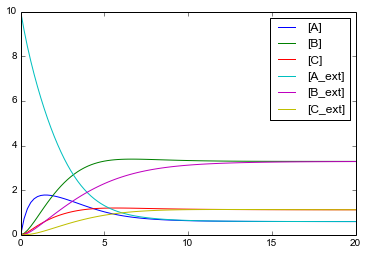

(101, 7)

In [30]:
# load model and generate equidistant timecourse for 20 [s]
rr = roadrunner.RoadRunner(sbml_filepath)
result = rr.simulate(0,20, 100, plot=True)
result.shape

In [31]:
result

    time,      [A],       [B],       [C],  [A_ext],   [B_ext],    [C_ext]
 [[    0,        0,         0,         0,       10,         0,          0],
  [  0.2, 0.722291, 0.0636592, 0.0359636,  9.16249, 0.0139675, 0.00162488],
  [  0.4,  1.17055,  0.201192,  0.115256,  8.43493, 0.0676093,  0.0104605],
  [  0.6,  1.44715,  0.380665,  0.211106,  7.78432,  0.148245,  0.0285142],
  [  0.8,  1.61452,  0.583941,  0.310233,  7.19123,  0.244987,  0.0550899],
  [    1,  1.71135,  0.799307,  0.406296,  6.64383,  0.350635,  0.0885847],
  [  1.2,  1.76188,   1.01801,   0.49659,   6.1348,  0.461449,    0.12728],
  [  1.4,  1.78147,   1.23435,    0.5801,  5.65954,  0.574888,   0.169664],
  [  1.6,   1.7799,   1.44434,  0.656713,  5.21515,  0.689422,    0.21448],
  [  1.8,  1.76358,   1.64545,  0.726598,  4.79972,  0.803894,   0.260748],
  [    2,  1.73685,   1.83601,  0.790009,  4.41194,  0.917468,   0.307715],
  [  2.2,  1.70218,     2.015,  0.847488,  4.05102,   1.02958,   0.354739],
  [  2.4,  1.6

In [32]:
result.shape

(101, 7)

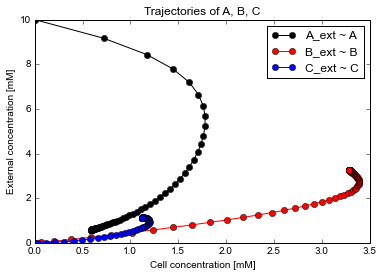

In [33]:
# plot some concentrations against each other
plt.plot(result['[A]'], result['[A_ext]'], '-o', color='black', label="A_ext ~ A")
plt.plot(result['[B]'], result['[B_ext]'], '-o', color='red', label="B_ext ~ B")
plt.plot(result['[C]'], result['[C_ext]'], '-o', color='blue', label="C_ext ~ C")
plt.xlabel('Cell concentration [mM]')
plt.ylabel('External concentration [mM]')
plt.title('Trajectories of A, B, C')
plt.legend()

### Selections

The content of the numerical output is defined via selections. Via selections the, components of the model we are interested in can be selected.
Currently only the time and all concentrations of the model are selected.

In [34]:
print rr.selections

['time', '[A]', '[B]', '[C]', '[A_ext]', '[B_ext]', '[C_ext]']


In [35]:
# get all the compartment volumes at end point
print rr.model.getCompartmentIds()
print rr.model.getCompartmentVolumes()

['extern', 'cell', 'membrane']
[  1.00000000e-06   1.00000000e-06   1.00000000e+00]


In [36]:
# get all the reactionRates at end point
print rr.model.getReactionIds()
print rr.model.getReactionRates()

['bA', 'bB', 'bC', 'v1', 'v2', 'v3', 'v4']
[  2.64980208e-10   2.13326815e-09  -9.89684422e-10   2.64268253e-07
   2.96582787e-07   5.60138389e-07  -2.62104914e-07]


Now we are interested in the rates. Adding them to the selection, and plot them.

In [37]:
rr.selections = ['time'] + rr.model.getReactionIds()
print rr.selections

['time', 'bA', 'bB', 'bC', 'v1', 'v2', 'v3', 'v4']


In [38]:
rr.reset() # reset to initial concentrations
s  = rr.simulate(0,20, 100, plot=False)  # equidistant timecourse for 20 [s]

In [39]:
# print first 20 rows of solution
s[0:19, :]

 [[   0, 4.54545e-06,           0,           0,           0,           0,           0,            0],
  [ 0.2, 3.87706e-06, 1.72055e-07, 2.26092e-08, 7.15925e-07, 3.61145e-07, 1.79818e-08,  2.06702e-09],
  [ 0.4, 3.42482e-06, 3.47509e-07, 6.70538e-08, 1.15043e-06, 5.85277e-07, 5.76281e-08,  7.33006e-09],
  [ 0.6,  3.0969e-06, 4.51778e-07, 1.12724e-07, 1.40908e-06, 7.23573e-07, 1.05553e-07,   1.0387e-08],
  [ 0.8, 2.84359e-06, 5.10116e-07, 1.51631e-07, 1.55613e-06,  8.0726e-07, 1.55116e-07,  9.13119e-09],
  [   1, 2.63623e-06, 5.43864e-07, 1.81815e-07, 1.63142e-06, 8.55675e-07, 2.03148e-07,   3.3215e-09],
  [ 1.2, 2.45761e-06, 5.62333e-07, 2.03821e-07, 1.66008e-06,  8.8094e-07, 2.48295e-07, -6.20657e-09],
  [ 1.4, 2.29716e-06, 5.71148e-07, 2.18913e-07, 1.65803e-06, 8.90733e-07,  2.9005e-07, -1.85363e-08],
  [ 1.6, 2.14836e-06, 5.73262e-07, 2.28474e-07, 1.63547e-06,  8.8995e-07, 3.28356e-07, -3.27284e-08],
  [ 1.8, 2.00715e-06, 5.70675e-07, 2.33664e-07, 1.59904e-06,  8.8179e-07, 3.63299e

In [40]:
print('A = {}'.format(rr.A))
print('Vmax_bA = {}'.format(rr.Vmax_bA))

A = 0.593165574596
Vmax_bA = 5.0


The units can be read out from the SBML file.

In [41]:
print model
print type(model)

<Model Koenig_demo_v02 "Koenig_demo_v02">
<class 'libsbml.Model'>


In [42]:
s = model.getSpecies('A')
print s, s.getId(), s.getName()
print s.getUnits()   # has mole as unit due to substance units
print s.has_only_substance_units

print s.toSBML()

udef =  s.getDerivedUnitDefinition()
libsbml.UnitDefinition_printUnits(udef)

<Species A "A cell"> A A cell
mole
False
<species id="A" name="A cell" compartment="cell" initialConcentration="0" substanceUnits="mole" hasOnlySubstanceUnits="false" boundaryCondition="false" constant="false"/>


'mole (exponent = 1, multiplier = 1, scale = 0), metre (exponent = -3, multiplier = 1, scale = 0)'

## Steady States

Proper simulation to steady state (i.e. with NEQ solvers and not just based on letting the simulation run for long).

In [43]:
# ? what does the value for time mean here ? 
# bug in the setup
print rr.selections
print rr.getSteadyStateValues()

['time', 'bA', 'bB', 'bC', 'v1', 'v2', 'v3', 'v4']
[ 0.59626946  3.31260812  1.12628676  0.59626926  3.31256046  1.12628659]


## Stoichiometric Matrix

Access to the stoichiometric matrix of the system is simple via

In [44]:
rr.getFullStoichiometryMatrix()

         bA, bB, bC, v1, v2, v3, v4
A     [[  1,  0,  0, -1, -1,  1,  0],
B      [  0, -1,  0,  1,  0,  0,  1],
C      [  0,  0, -1,  0,  1, -1, -1],
A_ext  [ -1,  0,  0,  0,  0,  0,  0],
B_ext  [  0,  1,  0,  0,  0,  0,  0],
C_ext  [  0,  0,  1,  0,  0,  0,  0]]

In [45]:
rr.getConservationMatrix()

 [[ 1, 1, 1, 1, 1, 1]]

## Jacobian Matrix

Access to Jacobian matrix of the systems via

In [46]:
rr.getFullJacobian()

                    A,            B,            C,        A_ext,        B_ext,        C_ext
A     [[ -3.78046e-06,        1e-07,        5e-07,  2.28046e-06,            0,            0],
B      [        1e-06, -6.30693e-07,        5e-07,            0,  2.80697e-07,            0],
C      [        5e-07,      2.5e-07, -1.38077e-06,            0,            0,  3.80766e-07],
A_ext  [  2.28046e-06,            0,            0, -2.28046e-06,            0,            0],
B_ext  [            0,  2.80693e-07,            0,            0, -2.80697e-07,            0],
C_ext  [            0,            0,  3.80766e-07,            0,            0, -3.80766e-07]]

## Metabolic Control Analysis

Direct access to metabolic control analysis, for instance the Concentration control coefficients.

In [47]:
rr.getScaledConcentrationControlCoefficientMatrix()

 [[   2.5218e-09, -1.49767e-10, -8.18498e-11,  -0.292398,  -0.223684,  0.422515,  0.0935673],
  [   2.5218e-09, -1.49767e-10, -8.18498e-11,  0.0631579, -0.0236842, 0.0447368, -0.0842105],
  [   2.5218e-09, -1.49767e-10, -8.18498e-11, -0.0309598,    0.18808, -0.355263,   0.198142],
  [ -4.00686e-08, -1.49767e-10, -8.18498e-11,  -0.292398,  -0.223684,  0.422515,  0.0935672],
  [   2.5218e-09,  3.05524e-10, -8.18498e-11,  0.0631579, -0.0236842, 0.0447368, -0.0842105],
  [   2.5218e-09, -1.49767e-10,  6.49984e-10, -0.0309598,    0.18808, -0.355263,   0.198142]]

## Repeated simulations

Parameter scan or multiple simulations.
Direct storage of simulation results in a list of numpy arrays.

First select a parameter to change continously from sampling.
Use additional roadrunner_tools for simplified simulation running.

In [55]:
import odesim.roadrunner.roadrunner_tools as rt
reload(rt)

<module 'odesim.roadrunner.roadrunner_tools' from '/home/mkoenig/multiscale-galactose/python/simulator/odesim/roadrunner/roadrunner_tools.py'>

In [56]:
# reload clean model
rr = roadrunner.RoadRunner(sbml_filepath)

Select parameters to change in the following simulations

In [60]:
# current value of Vmax_bA
rr.Vmax_bA 
rr.model.getBound

array([  0.,   0.,   0.,  10.,   0.,   0.])

### Global parameters

What are the global parameters in the model. To which values are these set in the model?

In [79]:
reload(rt)
gp = rt.getGlobalParameters(rr)

,value
scale_f,0.000001
Vmax_bA,5.000000
Km_A,1.000000
Vmax_bB,2.000000
Km_B,0.500000
Vmax_bC,2.000000
Km_C,3.000000
Vmax_v1,1.000000
Keq_v1,10.000000
Vmax_v2,0.500000


In [83]:
f_species = rt.getFloatingSpecies(rr)
f_species

,amount,concentration
A,0.00000,0
B,0.00000,0
C,0.00000,0
A_ext,0.00001,10
B_ext,0.00000,0
C_ext,0.00000,0


In [85]:
f_species.concentration['A_ext']

10.0

### BoundarySpecies

Which concentration values are set constant during the simulations? What are the boundary conditions, i.e. which species are not changing their values?

In [81]:
rt.getBoundarySpecies(rr)

,amount,concentration


In [68]:
gp.ix['Vmax_bB']

value    2
Name: Vmax_bB, dtype: float64

In [49]:
# kinetic eqution of reaction b1
rids = [r.getId() for r in model.getListOfReactions()]
print rids
r_bA = model.getReaction('bA')

['bA', 'bB', 'bC', 'v1', 'v2', 'v3', 'v4']


In [50]:
klaw_bA = r_bA.getKineticLaw()
print 'bA = {}'.format(klaw_bA.formula)

bA = scale_f * (Vmax_bA / Km_A) * (A_ext - A) / (1 + A_ext / Km_A + A / Km_A)


In [53]:
# load roadrunner tools for simplified setting of parameters and 
# initial values

import numpy as np
import time

# Create some parameter sampling
# Vmax_test = np.linspace(start=0, stop=10, num=20)
Vmax_test = np.random.normal(loc=5.0, scale=1.5, size=1000)
Vmax_test = np.maximum(0.0, Vmax_test) # nonnegative

t1 = time.time()
results = []  # quick and dirty, better preallocate matrices
for Vmax in Vmax_test:
    # create a parameter dict for the simulation
    parameters = {'Vmax_bA': Vmax}
    (s, _) = rt.simulation(rr, parameters, t_start=0, t_stop=20, steps=100, absTol=1e-08, relTol=1e-08, info=False)
    results.append(s)
plt.hist(Vmax_test, color='grey')
print 'time : {} [s]'.format(time.time() - t1)

TypeError: simulation() got multiple values for keyword argument 't_start'

Use matplotlib to plot the resulting curves.

In [71]:
# print r_b1.toSBML()

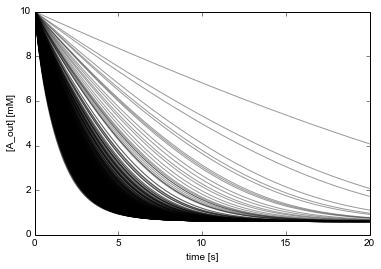

In [42]:
import matplotlib.pyplot as plt
for s in results:
    # plt.plot(results[0].transpose())
    plt.plot(s['time'], s['[A_out]'], color='black', alpha=0.4)
    plt.xlim(0, 20)
    plt.xlabel('time [s]')
    plt.ylabel('[A_out] [mM]')

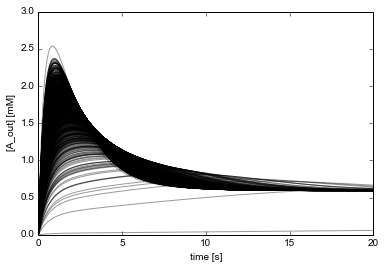

In [73]:
for s in results:
    # plt.plot(results[0].transpose())
    plt.plot(s['time'], s['[A_in]'], color='black', alpha=0.4)
    plt.xlim(0, 20)
    plt.xlabel('time [s]')
    plt.ylabel('[A_out] [mM]')

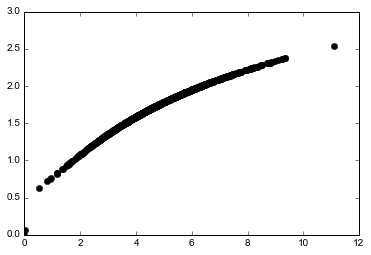

In [74]:
peaks = [max(s['[A_in]']) for s in results]
plt.plot(Vmax_test, peaks, 'o', color='black')